In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../.."))

In [2]:
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat

In [3]:
connector = Connector(ExportFormat.JSON)

In [4]:
theme_evolution_count = {}

level_3_themes = connector.client.get_themes_by_level(3)

for theme in level_3_themes:
    theme_evolution_count[theme["name"]]= {x: 0 for x in range(1985, 2025)}

for year in range(1985, 2026):
    questions = connector.client.aggregate_questions(
        [
            {"$match": {"question_date": {"$regex": f"{year}-"}}},
            {
                "$group": {
                    "_id": "$theme"
                    , "count": {"$sum": 1}
                }
            },
        ]
    )
    question_data_list = list(questions)
    for question_data in question_data_list:
        try:
            current_theme = dict(connector.client.get_theme({
                "name": question_data["_id"],
                "level": 0
            }))
        except Exception as _:
            print(question_data["_id"])
            continue
        
        top_theme = dict(connector.client.get_parent_theme(current_theme["parent_theme_identifier"]))
        if top_theme["level"] < 3:
            continue
        theme_evolution_count[top_theme["name"]][year] += question_data["count"]

Parcs de stationnement
Jouets et articles de sports
Budget de l'Etat
Impots sur les societes
Institutions sociales et medico sociales
Urbanisme et transports: ministere
Communication: secretariat d'Etat
Commerce et artisanat: ministere
Culture: ministere
Decorateurs
Expositions et salons
Comptabilite publique
Batiment et travaux publics
Budget et consommation: secretariat d'Etat
Redeploiement industriel et commerce exterieur: ministere
Defense: ministere
Interieur: ministere
Commerce, artisanat et tourisme: ministere
Universites: secretariat d'Etat
Recherche: ministere
Economie: ministere
Valeurs mobilieres
Cooperation: ministere
Droits de la femme: ministere
Premier ministre: services
Objets trouves
Jeunesse et sports: ministere
Taxe sur la valeur ajoutee
Plan: ministere
Rapatries: secretariat d'Etat
Education: ministere
Gages et hypotheques
Groupements et partis politiques
Mer: secretariat d'Etat
Peines
Assurances maladie maternite
Fonction publique: secretariat d'Etat
Grace et amnis

In [5]:
for theme_name in theme_evolution_count:
    for year, value in zip(theme_evolution_count[theme_name].keys(), theme_evolution_count[theme_name].values()):
        if year-1 in theme_evolution_count[theme_name]:
            previous_year_data = theme_evolution_count[theme_name][year - 1]
            theme_evolution_count[theme_name][year] += previous_year_data

[1194, 3211, 5033, 6503, 8556, 10193, 10789, 12148, 13199, 14492, 15457, 16112, 17452, 19036, 20979, 22626, 24114, 25573, 27748, 30015, 33115, 36700, 39535, 42305, 45980, 49691, 52954, 56642, 61308, 64537, 68030, 69127, 69705, 70816, 72016, 72915, 73728, 74332, 75206, 75634]
[414, 775, 1368, 1827, 2253, 2608, 2740, 3161, 3527, 3790, 3918, 4052, 4251, 4609, 5110, 5598, 5912, 6234, 6720, 7349, 8172, 8921, 9428, 10053, 10622, 11019, 11618, 11953, 12354, 12681, 12895, 13031, 13112, 13266, 13448, 13503, 13590, 13651, 13730, 13759]
[802, 2072, 3438, 4218, 4912, 5566, 5783, 6178, 6728, 7319, 7711, 8041, 8510, 9054, 9766, 10450, 11127, 11834, 13001, 14489, 16006, 17646, 18609, 19524, 20906, 22221, 23703, 24634, 26142, 27340, 28453, 29131, 29695, 30470, 31241, 32065, 32642, 33128, 33849, 34201]
[112, 293, 525, 642, 765, 868, 893, 949, 1059, 1169, 1218, 1312, 1455, 1596, 1699, 1860, 2032, 2174, 2528, 2666, 2858, 3065, 3339, 3522, 3834, 4452, 4741, 5149, 5431, 5685, 5844, 5932, 5998, 6078, 6128, 

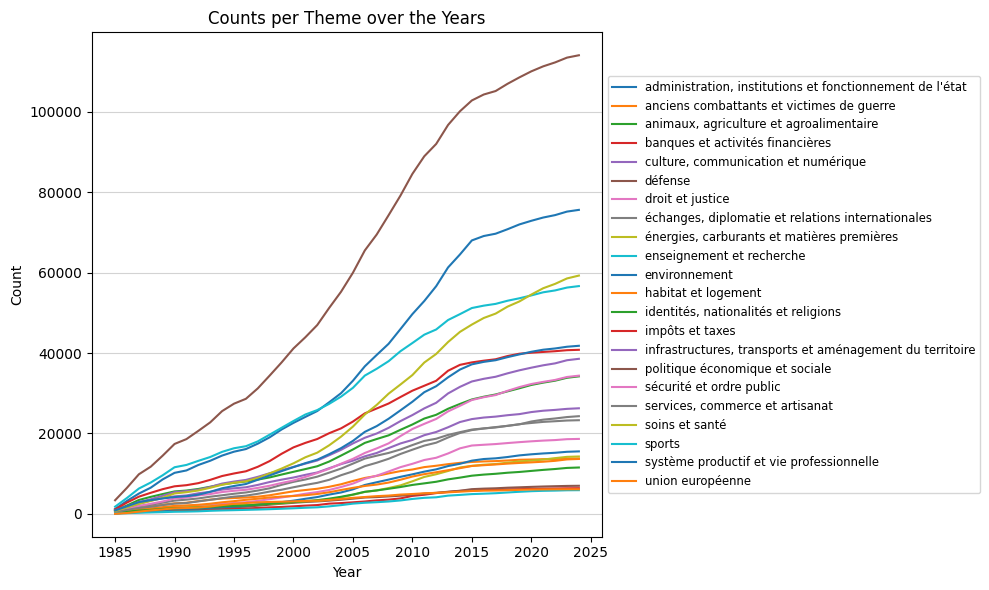

In [6]:
# Adjust the figure size for better readability
plt.figure(figsize=(10, 6))

color_hex_codes = [
    "#FF5733",
    "#33FF57",
    "#3357FF",
    "#FF33A8",
    "#A833FF",
    "#33FFF5",
    "#F5FF33",
    "#FF8C33",
    "#8C33FF",
    "#33FF8C",
    "#FF3333",
    "#33FF33",
    "#3333FF",
    "#FF33FF",
    "#33FFFF",
    "#FFD133",
    "#D133FF",
    "#33FFD1",
    "#FF333D",
    "#33FF69",
    "#3369FF",
    "#FF9633"
]

# Plot each theme
for i, (theme, values) in enumerate(theme_evolution_count.items()):
    years = list(values.keys())
    counts = list(values.values())
    print(counts)
    plt.plot(years, counts, label=theme)  # Adding markers to each point for clarity

# Customize the plot
plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts per Theme over the Years')
plt.grid(axis="y", color="lightgrey")

# Position the legend outside of the plot for readability
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Adjust the layout to make space for the legend
plt.tight_layout()

# Display the plot
plt.show()


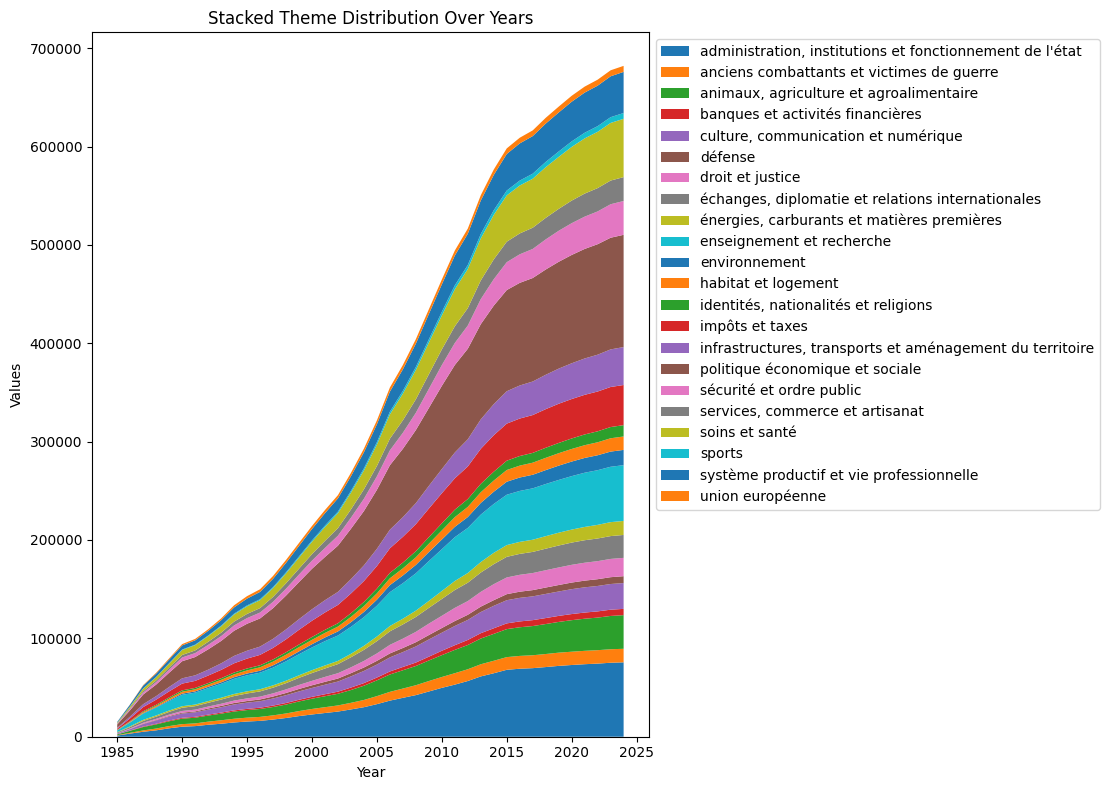

In [7]:
first_key = list(theme_evolution_count.keys())[0]
years = sorted(list(theme_evolution_count[first_key].keys()))
themes = list(theme_evolution_count.keys())

values = []
for theme in themes:
    theme_values = [theme_evolution_count[theme][year] for year in years]
    values.append(theme_values)

plt.figure(figsize=(14, 8))
plt.stackplot(years, values, labels=themes)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.title('Stacked Theme Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Values')

plt.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()

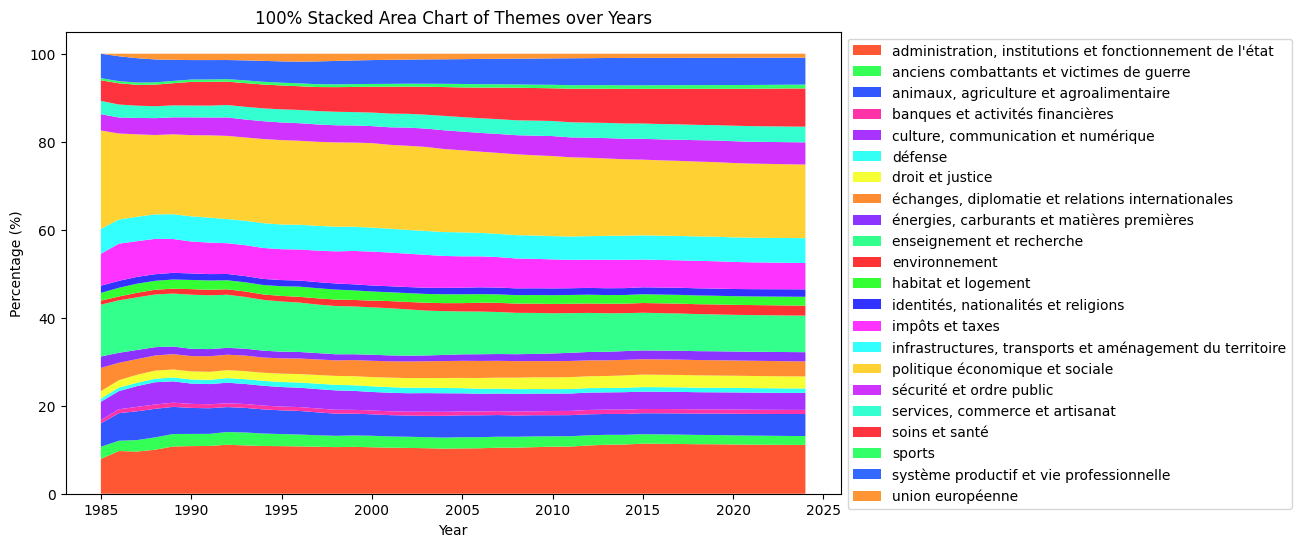

In [8]:
import numpy as np
years = sorted(next(iter(theme_evolution_count.values())).keys())
themes = list(theme_evolution_count.keys())

color_hex_codes = [
    "#FF5733",
    "#33FF57",
    "#3357FF",
    "#FF33A8",
    "#A833FF",
    "#33FFF5",
    "#F5FF33",
    "#FF8C33",
    "#8C33FF",
    "#33FF8C",
    "#FF3333",
    "#33FF33",
    "#3333FF",
    "#FF33FF",
    "#33FFFF",
    "#FFD133",
    "#D133FF",
    "#33FFD1",
    "#FF333D",
    "#33FF69",
    "#3369FF",
    "#FF9633"
]

# Create a matrix of values for each theme across years
values = np.array([[theme_evolution_count[theme][year] for year in years] for theme in themes])

# Normalize the data to 100% for each year
totals_per_year = np.sum(values, axis=0)
values_normalized = values / totals_per_year * 100

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(years, values_normalized, labels=themes, colors=color_hex_codes)

# Add legend and labels
plt.legend(loc='upper left')
plt.title('100% Stacked Area Chart of Themes over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.gca().set_facecolor((1.0, 1.0, 1.0))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()